In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [41]:
# import some data to play with
iris = pd.read_csv('iris.csv',index_col=0)
#iris = pd.read_csv('iris.csv')

In [42]:
iris.head()

,sepal_width,petal_length,petal_width,Species
sepal_length,,,,
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


In [43]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [44]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [45]:
x

,sepal_width,petal_length,petal_width,Species
sepal_length,,,,
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
...,...,...,...,...
6.7,3.0,5.2,2.3,2
6.3,2.5,5.0,1.9,2
6.5,3.0,5.2,2.0,2


In [47]:
y

sepal_length
5.1    0
4.9    0
4.7    0
4.6    0
5.0    0
      ..
6.7    2
6.3    2
6.5    2
6.2    2
5.9    2
Name: Species, Length: 150, dtype: int32

In [48]:
iris['Species'].unique()

array([0, 1, 2])

In [49]:
iris.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [50]:
colnames = list(iris.columns)
colnames

['sepal_width', 'petal_length', 'petal_width', 'Species']

In [51]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [64]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

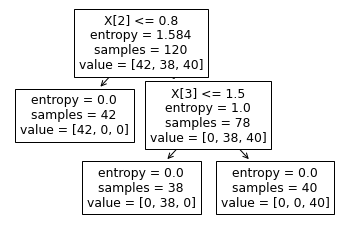

In [65]:
#PLot the decision tree
tree.plot_tree(model);


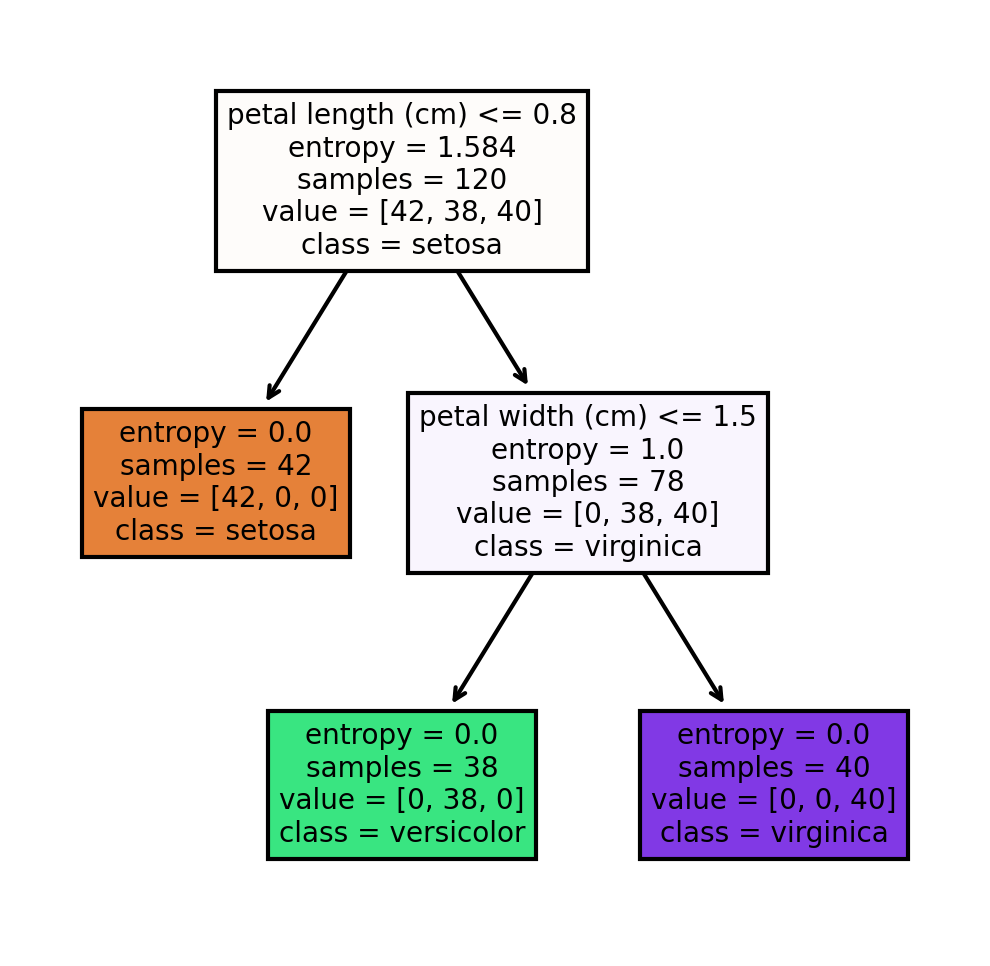

In [66]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [67]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    12
2    10
0     8
dtype: int64

In [68]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [69]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [70]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [71]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [72]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

#### Decision Tree Regression Example

In [74]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [75]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [77]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [78]:
#Find the accuracy
model.score(X_test,y_test)

0.9351070733290071